In [0]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np

In [0]:
def get_data(url):
    page=pd.read_html(url,encoding='CP1251')
    header=page[6].drop(12).T
    header=header.iloc[1]
    header[0]='Номер УИК'
    data=page[7].drop(12).T
    data.columns=header
    data.reset_index()
    return data

def to_numeric(data):
    data.iloc[:,0]=[int(i.split()[1][1:]) for i in data.iloc[:,0]]
    for i in range(1,12):
        data.iloc[:,i]=pd.to_numeric(data.iloc[:,i])
    for i in range(12,15):
        l=[]
        perc=[]
        for a in data.iloc[:,i]:
            a=a.split()
            l.append(int(a[0]))
            perc.append(float(a[1][:-2]))
        data.iloc[:,i]=l
        data['% за '+str(data.columns.values[i])]=perc
    return data
  
url9='http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217427&type=222'
url12='http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217430&type=222'
url28='http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217446&type=222'
data=get_data(url9).append(get_data(url12)).append(get_data(url28))
data=to_numeric(data)
data.head()

1,Номер УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,% за Амосов Михаил Иванович,% за Беглов Александр Дмитриевич,% за Тихонова Надежда Геннадьевна
0,1793,1930,1600,804,18,778,18,804,23,799,0,0,124,578,97,15.0,70.3,11.8
1,1794,2343,2000,1050,13,937,13,1033,18,1028,0,0,127,793,108,12.1,75.8,10.3
2,1795,1826,1500,814,11,675,11,814,25,800,0,0,44,722,34,5.3,87.5,4.1
3,1796,1462,1200,586,13,601,13,580,19,574,0,0,66,438,70,11.1,73.8,11.8
4,1797,1754,1500,613,4,883,4,612,24,592,0,0,100,401,91,16.2,65.1,14.7


In [0]:
df = data[['Число избирателей, внесенных в список избирателей на момент окончания голосования', 
           "% за Амосов Михаил Иванович",
          "% за Беглов Александр Дмитриевич",
          "% за Тихонова Надежда Геннадьевна"]]
df = df.rename(columns =
               {"Число избирателей, внесенных в список избирателей на момент окончания голосования" : "number_of_voters", 
                "% за Амосов Михаил Иванович" : "pr_for_Amosov",
               "% за Беглов Александр Дмитриевич" : "pr_for_Beglov",
               "% за Тихонова Надежда Геннадьевна" : "pr_for_Tikhonova"})
turnout = round((data.iloc[:,3] + data.iloc[:,4])*100/data.iloc[:,1])
df['turnout'] =turnout
df.head()

1,number_of_voters,pr_for_Amosov,pr_for_Beglov,pr_for_Tikhonova,turnout
0,1930,15.0,70.3,11.8,43.0
1,2343,12.1,75.8,10.3,45.0
2,1826,5.3,87.5,4.1,45.0
3,1462,11.1,73.8,11.8,41.0
4,1754,16.2,65.1,14.7,35.0


аномальные выбросы и магические числа;
визуализировать результаты голосования на карте.

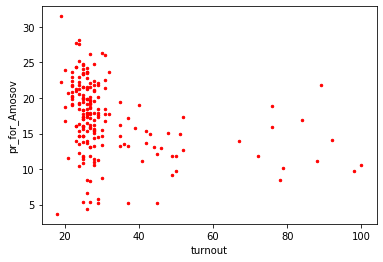

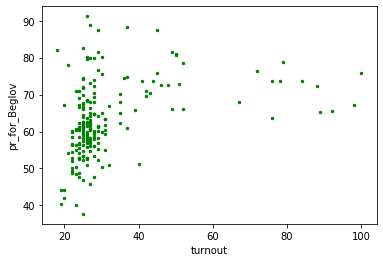

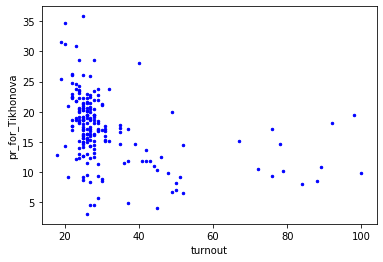

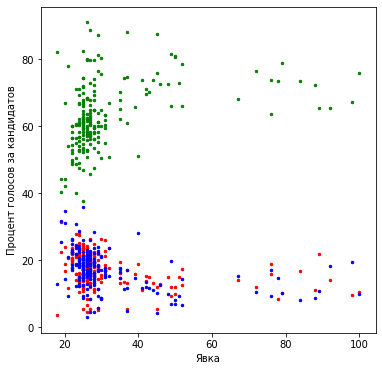

In [0]:
### зависимость процента голосов за кандидатов от явки
df.plot.scatter(x='turnout', y='pr_for_Amosov', c = 'r', s = 6)
df.plot.scatter(x='turnout', y='pr_for_Beglov', c = 'g', s = 6)
df.plot.scatter(x='turnout', y='pr_for_Tikhonova', c = 'b', s = 6)
### все вместе
plt.figure(figsize=(6, 6))
plt.scatter(turnout, df.pr_for_Amosov, c = 'r', s = 6)
plt.scatter(turnout, df.pr_for_Beglov, c = 'g', s = 6)
plt.scatter(turnout, df.pr_for_Tikhonova, c = 'b', s = 6)
plt.ylabel('Процент голосов за кандидатов')
plt.xlabel('Явка')
plt.show()

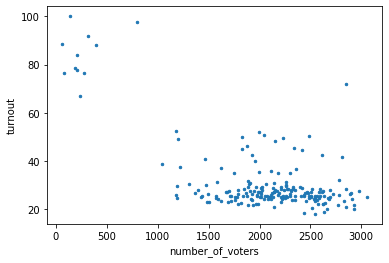

In [0]:
### зависимость явки от количества избирателей на участке
df.plot.scatter(x='number_of_voters', y='turnout', s=6, figsize=(6, 4))

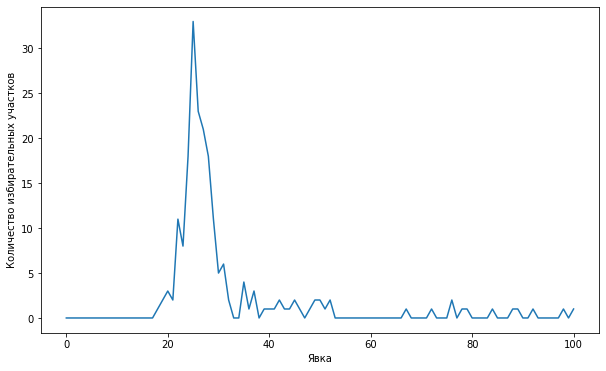

In [0]:
#количество избирательных участков в зависимости от явки
count_of_UIKs = np.array([])
for i in range(101):
  count_of_UIKs = np.append(count_of_UIKs, 0)
for i in turnout:
    for j in range(101):
        if i==j:
            count_of_UIKs[j] +=1.0

plt.figure(figsize=(10, 6))
plt.plot(count_of_UIKs)
plt.ylabel('Количество избирательных участков')
plt.xlabel('Явка')
plt.show()